In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/olympics-2024/Olympics 2024.csv


In [2]:
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("/kaggle/input/olympics-2024/Olympics 2024.csv")
df

,Competitions,Rank,NOC,Gold,Silver,Bronze,Total
0,Archery,1,South Korea,5,1,1,7
1,Archery,2,France*,0,1,1,2
2,Archery,3,United States,0,1,1,2
3,Archery,4,China,0,1,0,1
4,Archery,5,Germany,0,1,0,1
...,...,...,...,...,...,...,...
449,Wrestling,22,Denmark,0,0,1,1
450,Wrestling,23,Greece,0,0,1,1
451,Wrestling,24,India,0,0,1,1
452,Wrestling,25,Norway,0,0,1,1


In [4]:
print(df.isnull().sum())
print("###################")
print(df.duplicated().sum())

Competitions    0
Rank            0
NOC             0
Gold            0
Silver          0
Bronze          0
Total           0
dtype: int64
###################
0


In [5]:
df.describe()

,Gold,Silver,Bronze,Total
count,454.000000,454.000000,454.000000,454.000000
mean,0.724670,0.726872,0.848018,2.299559
std,1.329396,1.228912,1.110370,2.900582
min,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,2.000000
max,14.000000,13.000000,9.000000,34.000000


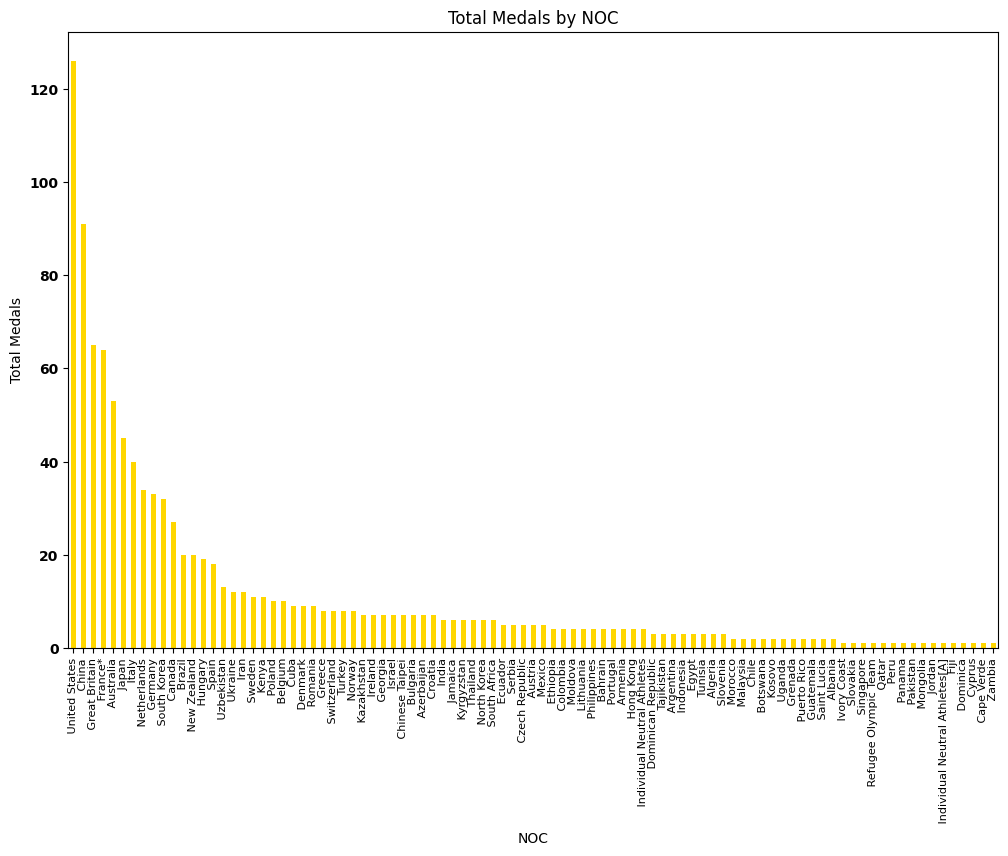

In [6]:
noc_totals = df.groupby('NOC')['Total'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
noc_totals.plot(kind='bar', color='gold')
plt.title('Total Medals by NOC')
plt.xlabel('NOC')
plt.ylabel('Total Medals')
plt.xticks(rotation=90, fontsize=8, )
plt.yticks(fontsize=10, fontweight='bold')
plt.show()

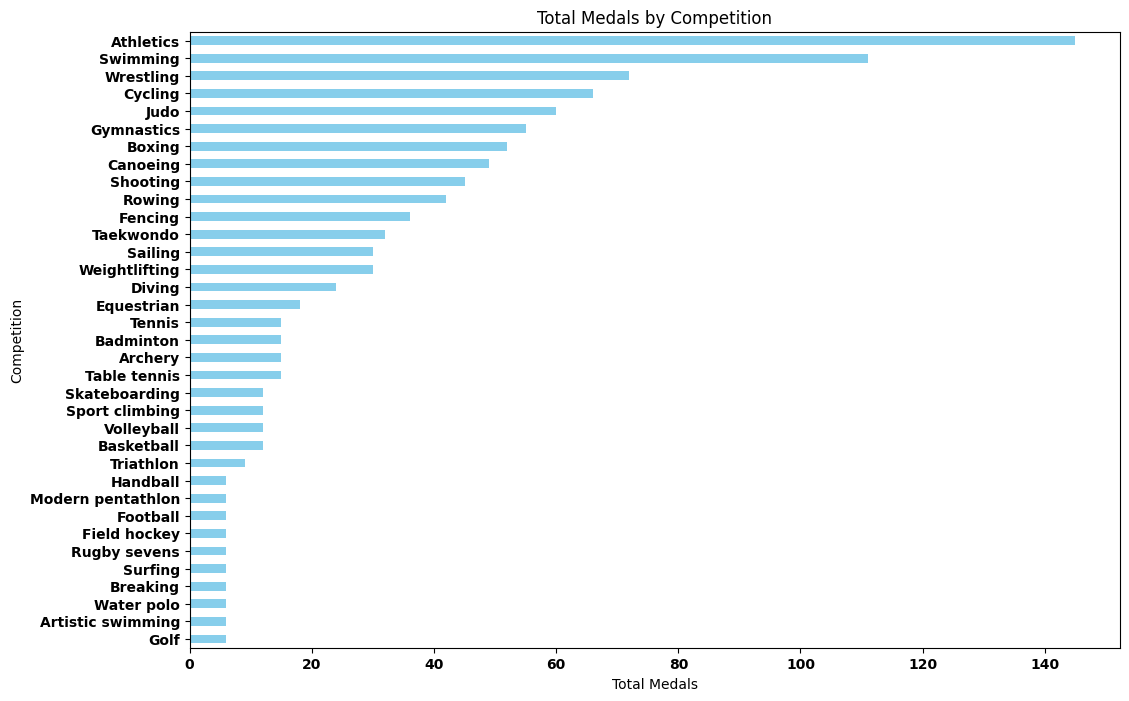

In [7]:
competition_totals = df.groupby('Competitions')[['Gold', 'Silver', 'Bronze', 'Total']].sum()
competition_totals['Total'].sort_values().plot(kind='barh', figsize=(12, 8), color='skyblue')
plt.title('Total Medals by Competition')
plt.xlabel('Total Medals')
plt.ylabel('Competition')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.show()

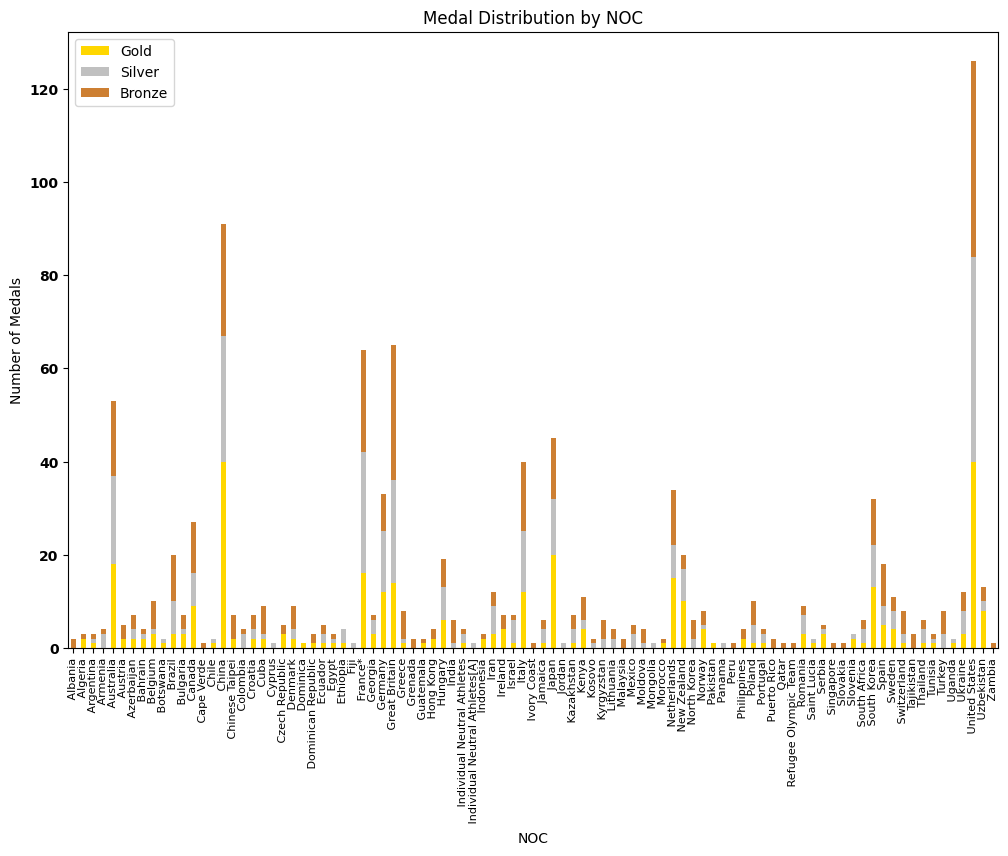

In [8]:
noc_medals = df.groupby('NOC')[['Gold', 'Silver', 'Bronze']].sum()
noc_medals.plot(kind='bar', stacked=True, figsize=(12, 8), color=['gold', 'silver', '#cd7f32'])
plt.title('Medal Distribution by NOC')
plt.xlabel('NOC')
plt.ylabel('Number of Medals')
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=10, fontweight='bold')
plt.legend(['Gold', 'Silver', 'Bronze'])
plt.show()


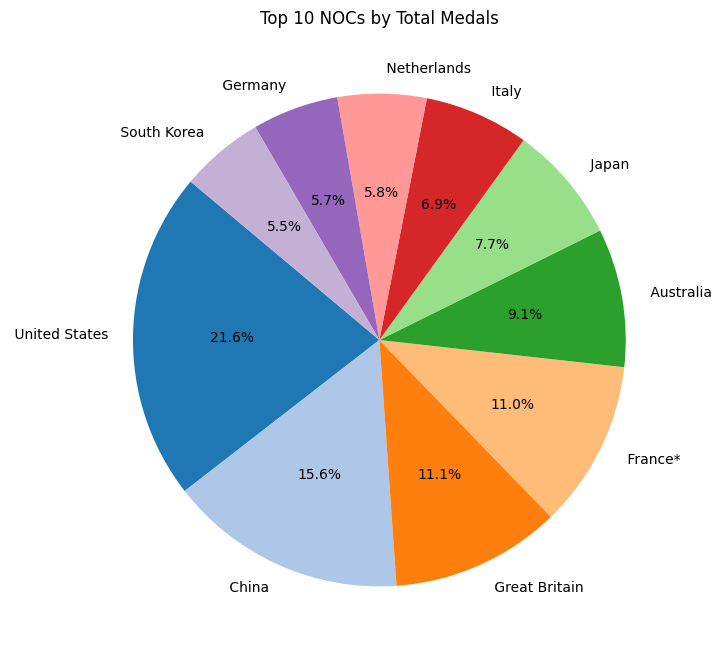

In [9]:
top_nocs = noc_totals.head(10)
plt.figure(figsize=(8, 8))
top_nocs.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Top 10 NOCs by Total Medals')
plt.ylabel('')
plt.show()

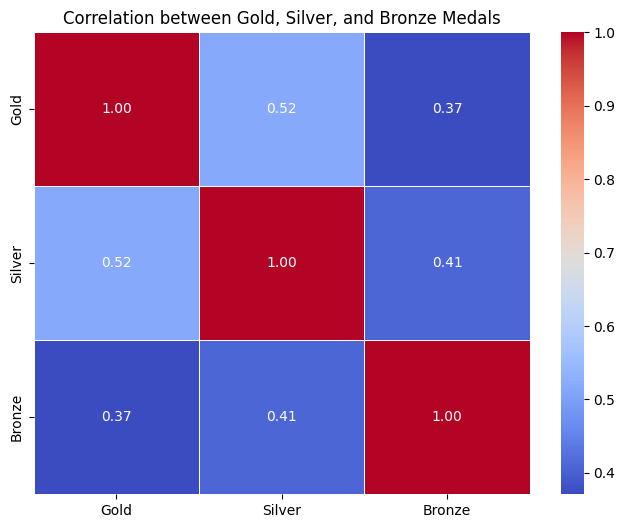

In [10]:
import seaborn as sns
corr_matrix = df[['Gold', 'Silver', 'Bronze']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation between Gold, Silver, and Bronze Medals')
plt.show()


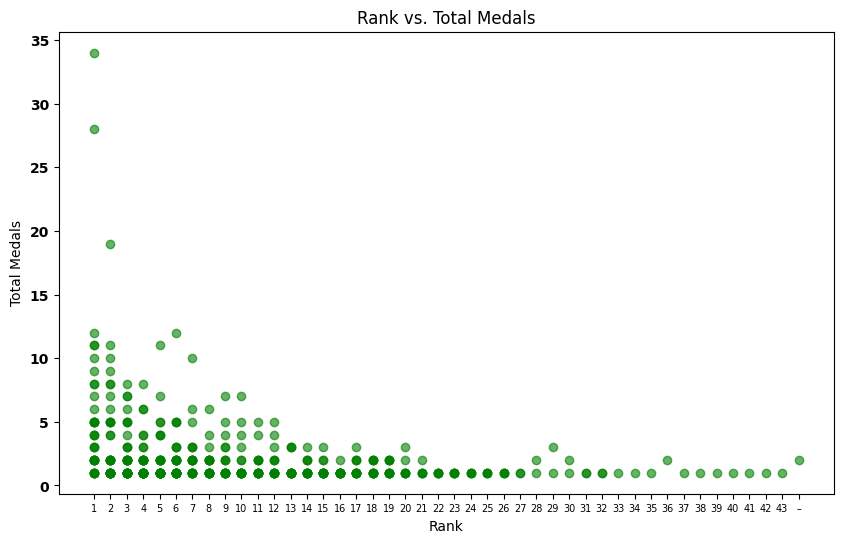

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Rank'], df['Total'], color='green', alpha=0.6)
plt.title('Rank vs. Total Medals')
plt.xlabel('Rank')
plt.ylabel('Total Medals')
plt.xticks(fontsize=7)
plt.yticks(fontsize=10, fontweight='bold')
plt.show()

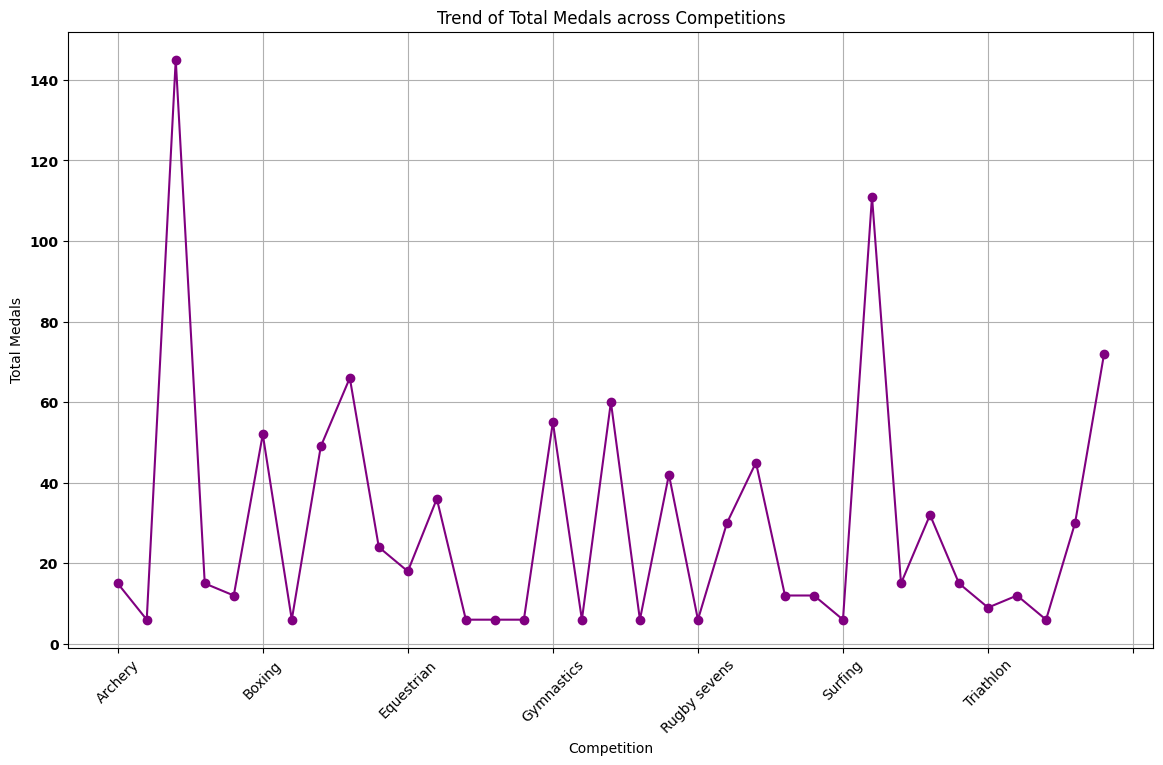

In [12]:
trend_data = df.groupby('Competitions')['Total'].sum()
plt.figure(figsize=(14, 8))
trend_data.plot(kind='line', marker='o', linestyle='-', color='purple')
plt.title('Trend of Total Medals across Competitions')
plt.xlabel('Competition')
plt.ylabel('Total Medals')
plt.xticks(rotation=45, fontsize=10,)
plt.yticks(fontsize=10, fontweight='bold')
plt.grid(True)
plt.show()

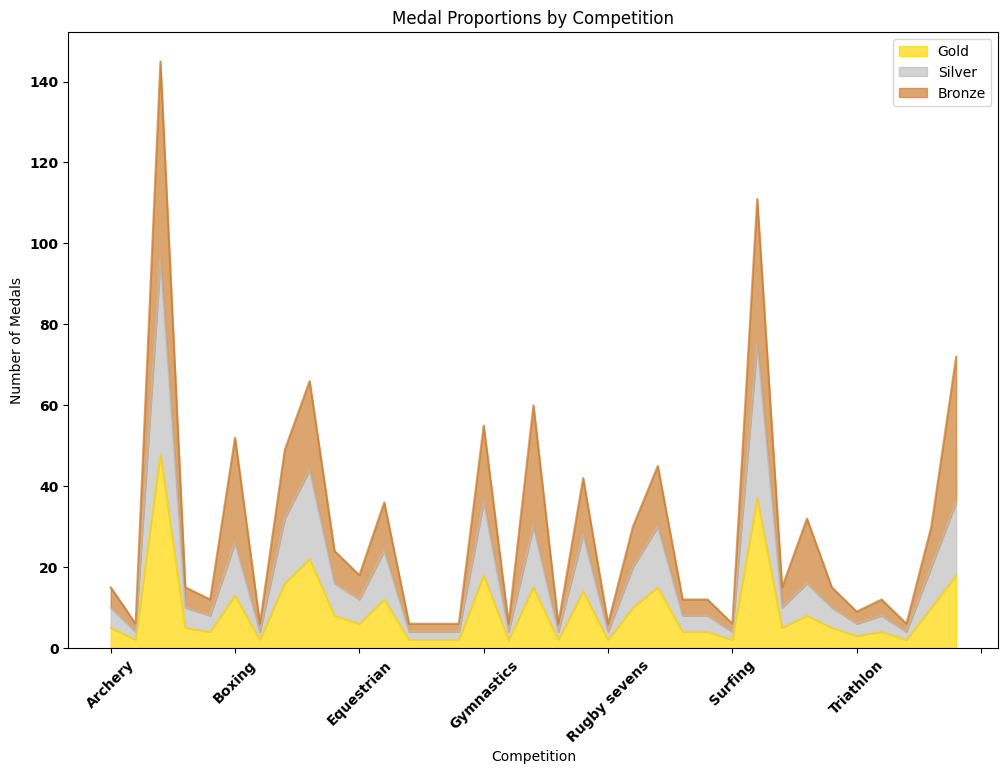

In [13]:
competition_medals = df.groupby('Competitions')[['Gold', 'Silver', 'Bronze']].sum()
competition_medals.plot(kind='area', stacked=True, figsize=(12, 8), color=['gold', 'silver', '#cd7f32'], alpha=0.7)
plt.title('Medal Proportions by Competition')
plt.xlabel('Competition')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45, fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.show()


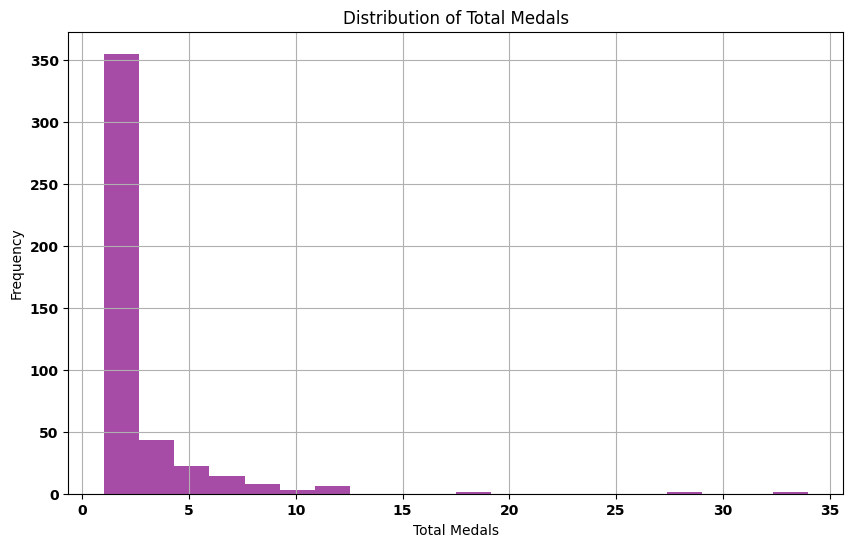

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(df['Total'], bins=20, color='purple', alpha=0.7)
plt.title('Distribution of Total Medals')
plt.xlabel('Total Medals')
plt.ylabel('Frequency')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.grid(True)
plt.show()

/tmp/ipykernel_18/800196704.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Total'], shade=True, color='blue')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


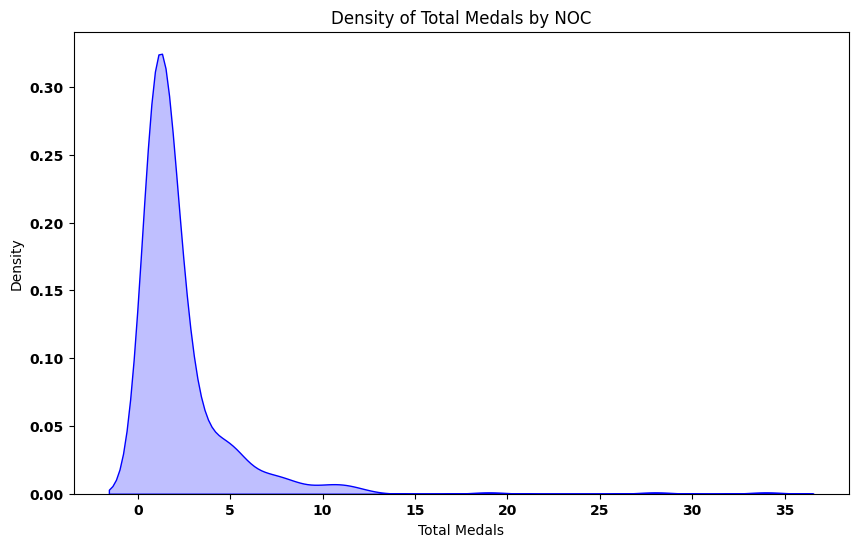

In [15]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Total'], shade=True, color='blue')
plt.title('Density of Total Medals by NOC')
plt.xlabel('Total Medals')
plt.ylabel('Density')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.show()

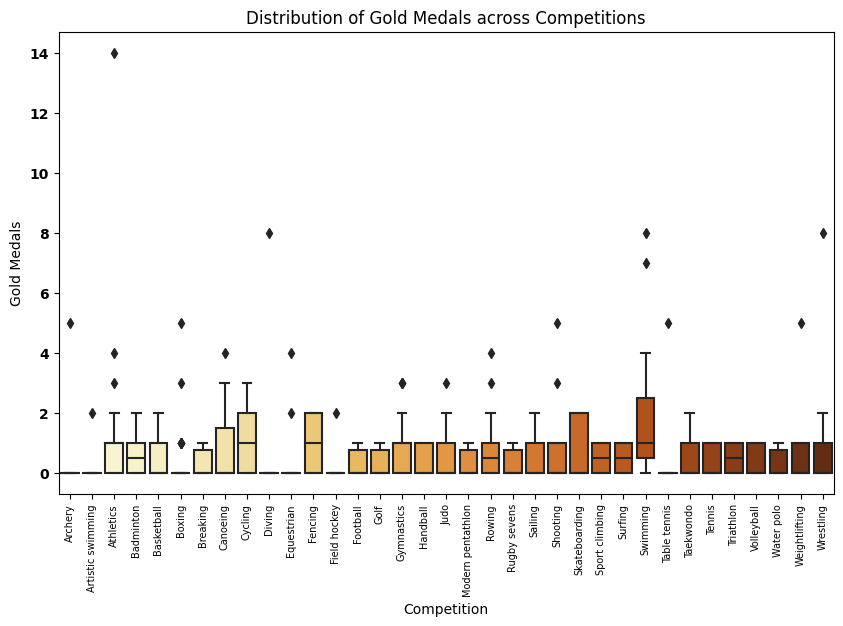

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Competitions', y='Gold', data=df, palette='YlOrBr')
plt.title('Distribution of Gold Medals across Competitions')
plt.xlabel('Competition')
plt.ylabel('Gold Medals')
plt.xticks(rotation=90, fontsize=7,)
plt.yticks(fontsize=10, fontweight='bold')
plt.show()

In [17]:
from scipy.stats import pearsonr
corr_gold_silver, p_value_gold_silver = pearsonr(df['Gold'], df['Silver'])
print(f'Correlation between Gold and Silver medals: {corr_gold_silver}, p-value: {p_value_gold_silver}')
corr_gold_bronze, p_value_gold_bronze = pearsonr(df['Gold'], df['Bronze'])
print(f'Correlation between Gold and Bronze medals: {corr_gold_bronze}, p-value: {p_value_gold_bronze}')

Correlation between Gold and Silver medals: 0.5173274473620008, p-value: 1.937308432872372e-32
Correlation between Gold and Bronze medals: 0.3708817291637434, p-value: 2.9825480804471525e-16


In [18]:
from scipy.stats import f_oneway
top_nocs = df['NOC'].unique()[:5]  
groups = [df[df['NOC'] == noc]['Total'] for noc in top_nocs]
f_stat, p_val = f_oneway(*groups)
print(f'ANOVA test result - F-statistic: {f_stat}, p-value: {p_val}')

ANOVA test result - F-statistic: 0.9517062619680503, p-value: 0.43781414446075895


In [19]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Competitions'], df['Gold'])
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f'Chi-square test result - Chi2: {chi2}, p-value: {p}, Degrees of Freedom: {dof}')

Chi-square test result - Chi2: 250.8950817852779, p-value: 0.8161026280731735, Degrees of Freedom: 272


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


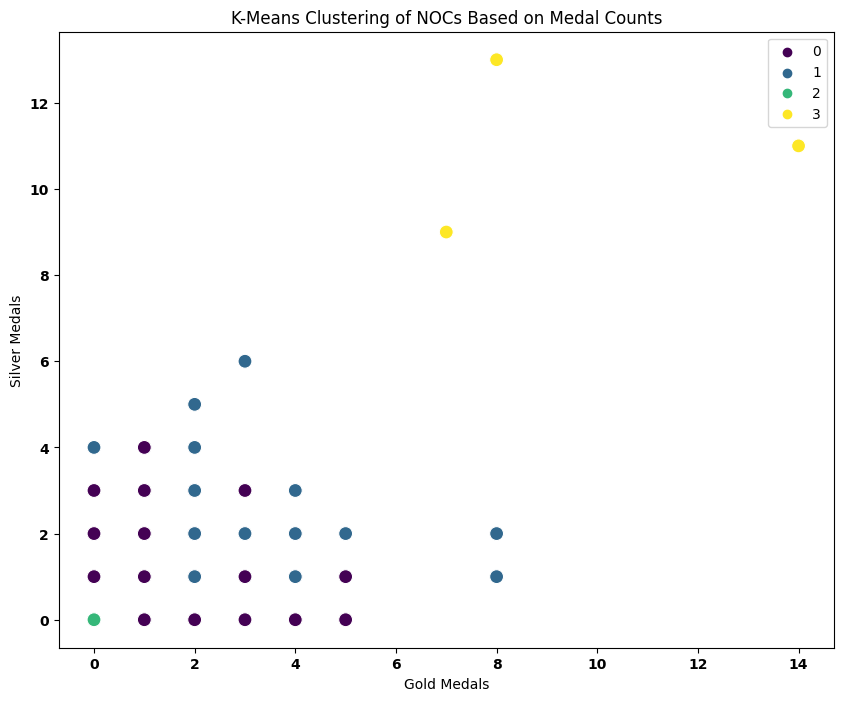

In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Gold', 'Silver', 'Bronze']])
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Gold', y='Silver', hue='Cluster', palette='viridis', data=df, s=100)
plt.title('K-Means Clustering of NOCs Based on Medal Counts')
plt.xlabel('Gold Medals')
plt.ylabel('Silver Medals')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.legend()
plt.show()

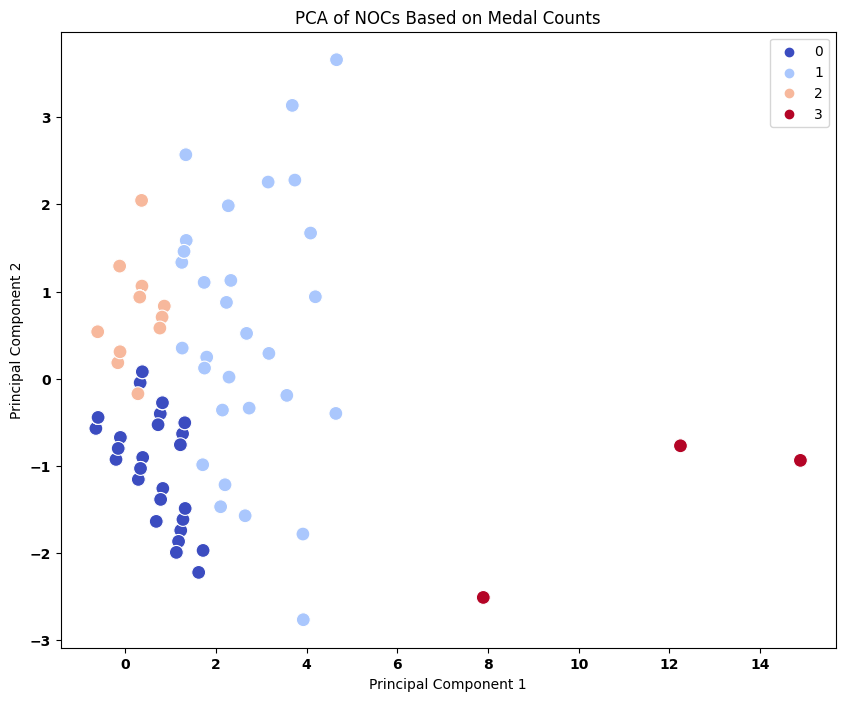

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='coolwarm', data=df, s=100)
plt.title('PCA of NOCs Based on Medal Counts')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.legend()
plt.show()


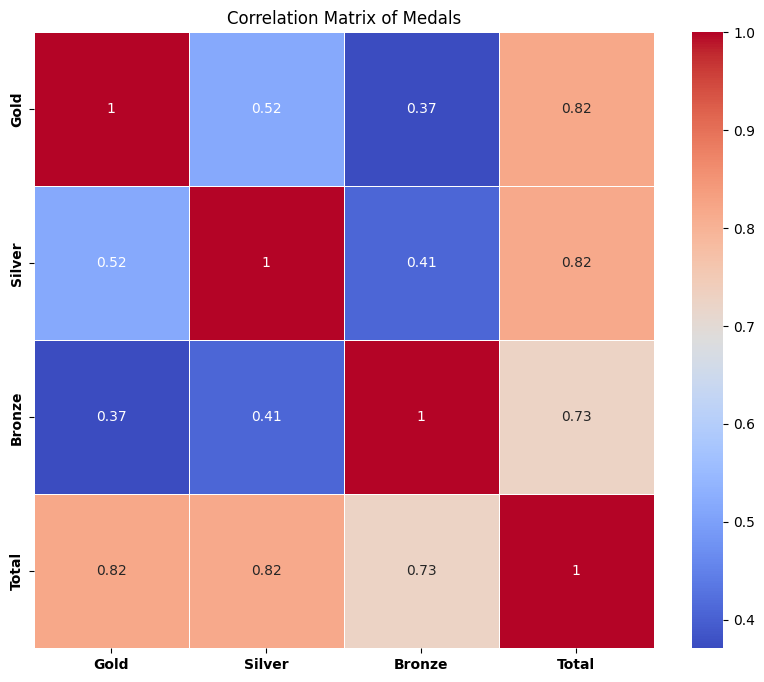

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Gold', 'Silver', 'Bronze', 'Total']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Medals')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.show()

In [23]:
df_noc = df[df['NOC'] == 'United States']

In [24]:
df

,Competitions,Rank,NOC,Gold,Silver,Bronze,Total,Cluster,PCA1,PCA2
0,Archery,1,South Korea,5,1,1,7,1,2.104735,-1.467912
1,Archery,2,France*,0,1,1,2,2,-0.113563,0.309386
2,Archery,3,United States,0,1,1,2,2,-0.113563,0.309386
3,Archery,4,China,0,1,0,1,0,-0.597360,-0.443782
4,Archery,5,Germany,0,1,0,1,0,-0.597360,-0.443782
...,...,...,...,...,...,...,...,...,...,...
449,Wrestling,22,Denmark,0,0,1,1,2,-0.605696,0.538849
450,Wrestling,23,Greece,0,0,1,1,2,-0.605696,0.538849
451,Wrestling,24,India,0,0,1,1,2,-0.605696,0.538849
452,Wrestling,25,Norway,0,0,1,1,2,-0.605696,0.538849


Text(0.5, 1.0, 'Silver Medal Distribution')

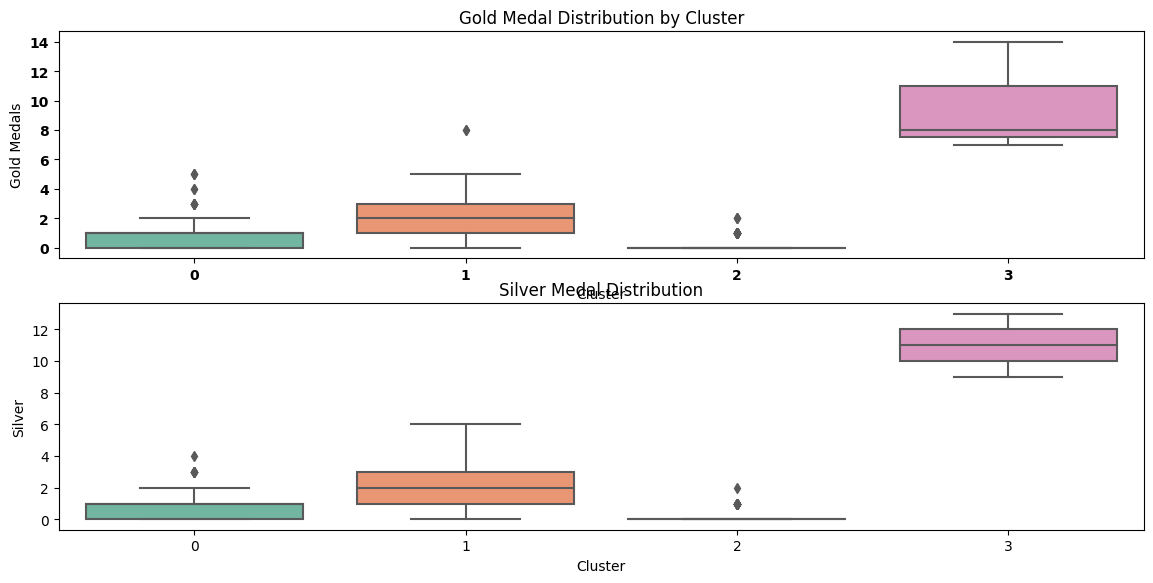

In [25]:
plt.figure(figsize=(14, 10))
plt.subplot(3, 1, 1)
sns.boxplot(x='Cluster', y='Gold', data=df, palette='Set2')
plt.title('Gold Medal Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Gold Medals')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.subplot(3, 1, 2)
sns.boxplot(x='Cluster', y='Silver', data=df, palette='Set2')
plt.title('Silver Medal Distribution')

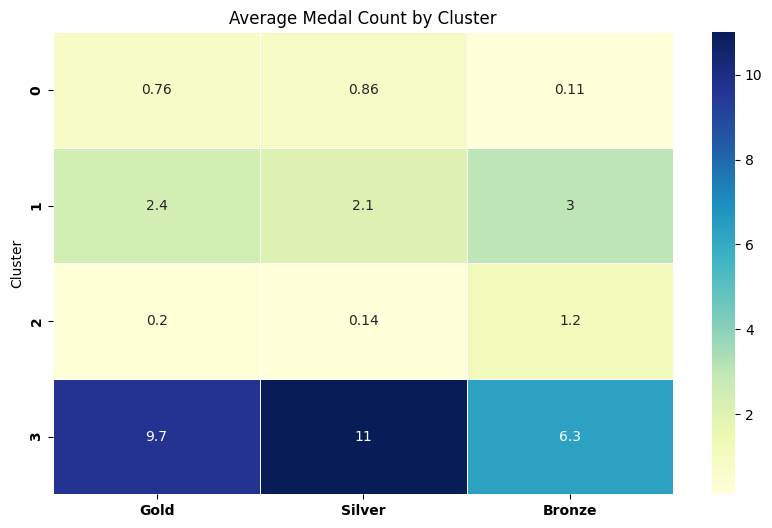

In [26]:
cluster_medals = df.groupby('Cluster')[['Gold', 'Silver', 'Bronze']].mean()
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_medals, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Average Medal Count by Cluster')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.show()

In [27]:
from scipy.stats import f_oneway
gold_cluster_0 = df[df['Cluster'] == 0]['Gold']
gold_cluster_1 = df[df['Cluster'] == 1]['Gold']
gold_cluster_2 = df[df['Cluster'] == 2]['Gold']
f_stat, p_value = f_oneway(gold_cluster_0, gold_cluster_1, gold_cluster_2)
print(f'ANOVA Test for Gold Medals: F-statistic = {f_stat}, p-value = {p_value}')

ANOVA Test for Gold Medals: F-statistic = 100.48219150978669, p-value = 8.88795837619448e-37


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

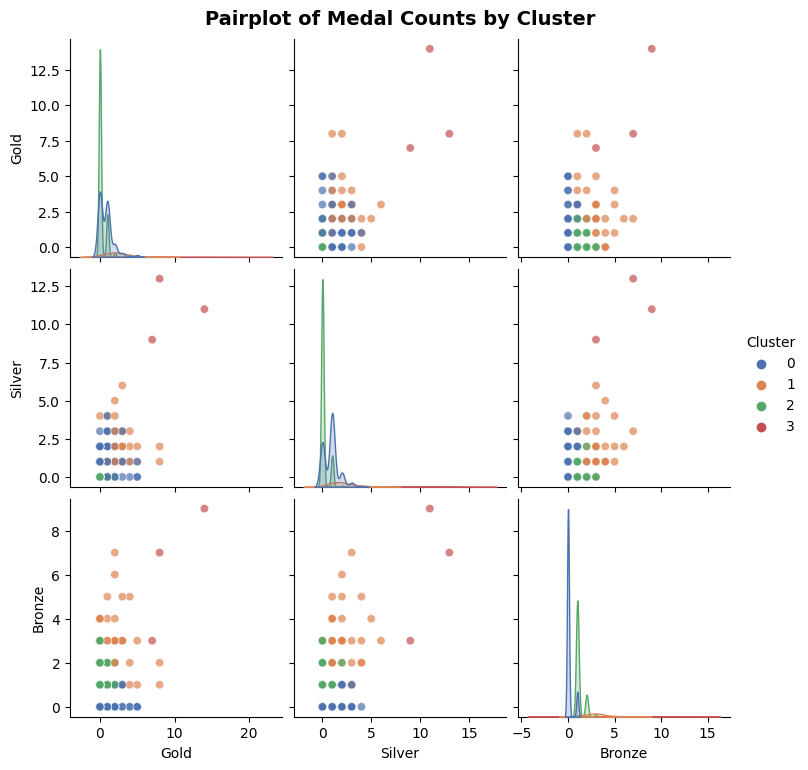

In [28]:
sns.pairplot(df, hue='Cluster', vars=['Gold', 'Silver', 'Bronze'], palette='deep', diag_kind='kde', plot_kws={'alpha': 0.7})
plt.suptitle('Pairplot of Medal Counts by Cluster', y=1.02, fontsize=14, fontweight='bold')
plt.show()

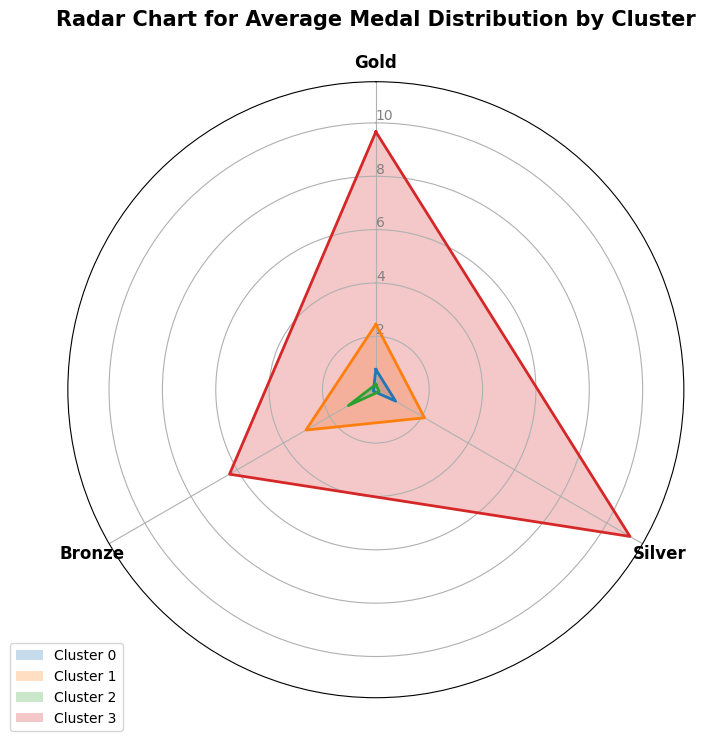

In [29]:
import numpy as np
from math import pi
cluster_averages = df.groupby('Cluster')[['Gold', 'Silver', 'Bronze']].mean().reset_index()
labels = cluster_averages.columns[1:]
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # complete the loop# Plot each cluster
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for i in range(cluster_averages.shape[0]):
    values = cluster_averages.iloc[i, 1:].tolist()
    values += values[:1]
    ax.fill(angles, values, label=f'Cluster {cluster_averages.iloc[i, 0]}', alpha=0.25)
    ax.plot(angles, values, linewidth=2)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.set_rlabel_position(0)
plt.xticks(angles[:-1], labels, fontsize=12, fontweight='bold')
plt.yticks(color='grey', size=10)
plt.title('Radar Chart for Average Medal Distribution by Cluster', size=15, fontweight='bold', pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()


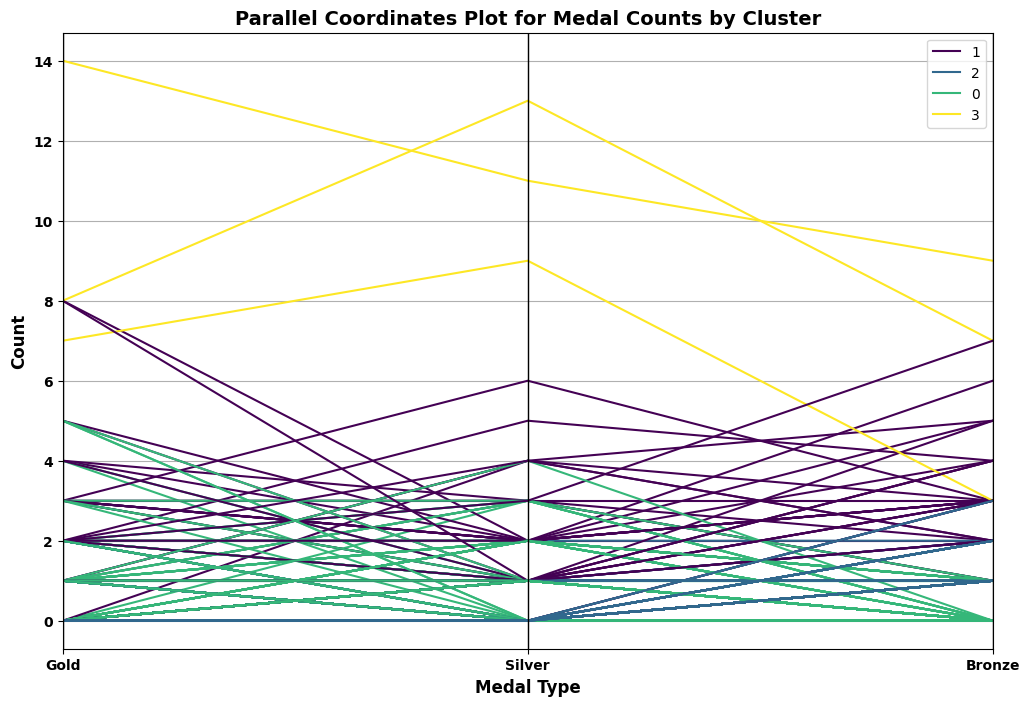

In [30]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(12, 8))
parallel_coordinates(df[['Gold', 'Silver', 'Bronze', 'Cluster']], 'Cluster', color=plt.cm.viridis(np.linspace(0, 1, len(df['Cluster'].unique()))))
plt.title('Parallel Coordinates Plot for Medal Counts by Cluster', fontsize=14, fontweight='bold')
plt.xlabel('Medal Type', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.grid(True)
plt.show()

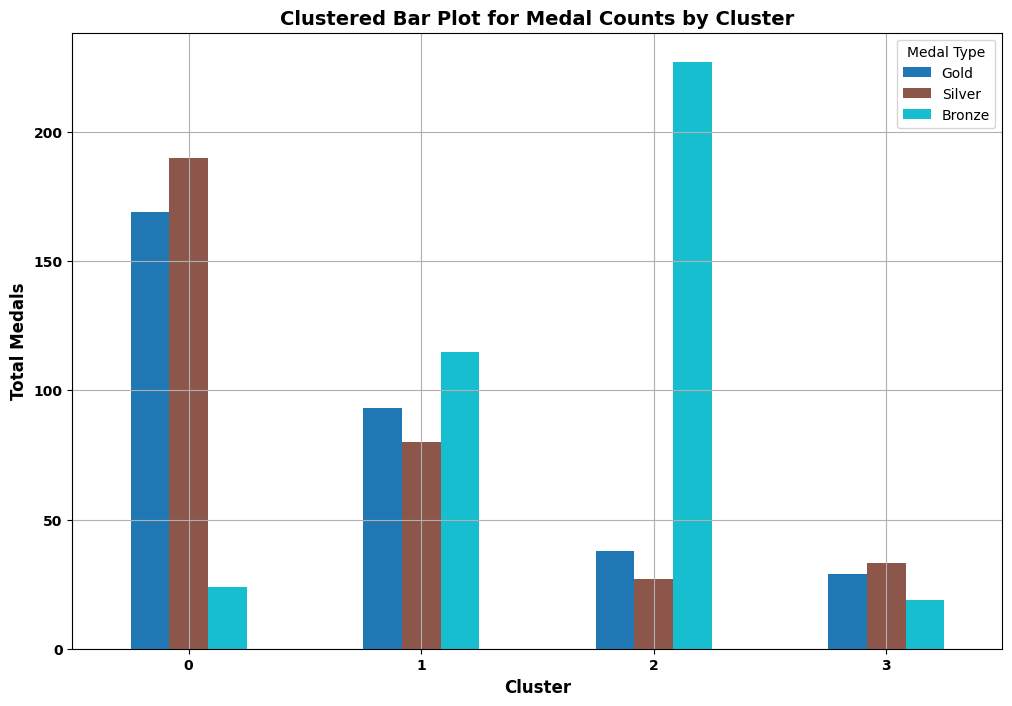

In [31]:
medal_counts = df.groupby('Cluster')[['Gold', 'Silver', 'Bronze']].sum().reset_index()
medal_counts.set_index('Cluster', inplace=True)
medal_counts.plot(kind='bar', stacked=False, figsize=(12, 8), colormap='tab10')
plt.title('Clustered Bar Plot for Medal Counts by Cluster', fontsize=14, fontweight='bold')
plt.xlabel('Cluster', fontsize=12, fontweight='bold')
plt.ylabel('Total Medals', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold', rotation=0)
plt.yticks(fontsize=10, fontweight='bold')
plt.legend(title='Medal Type', fontsize=10)
plt.grid(True)
plt.show()


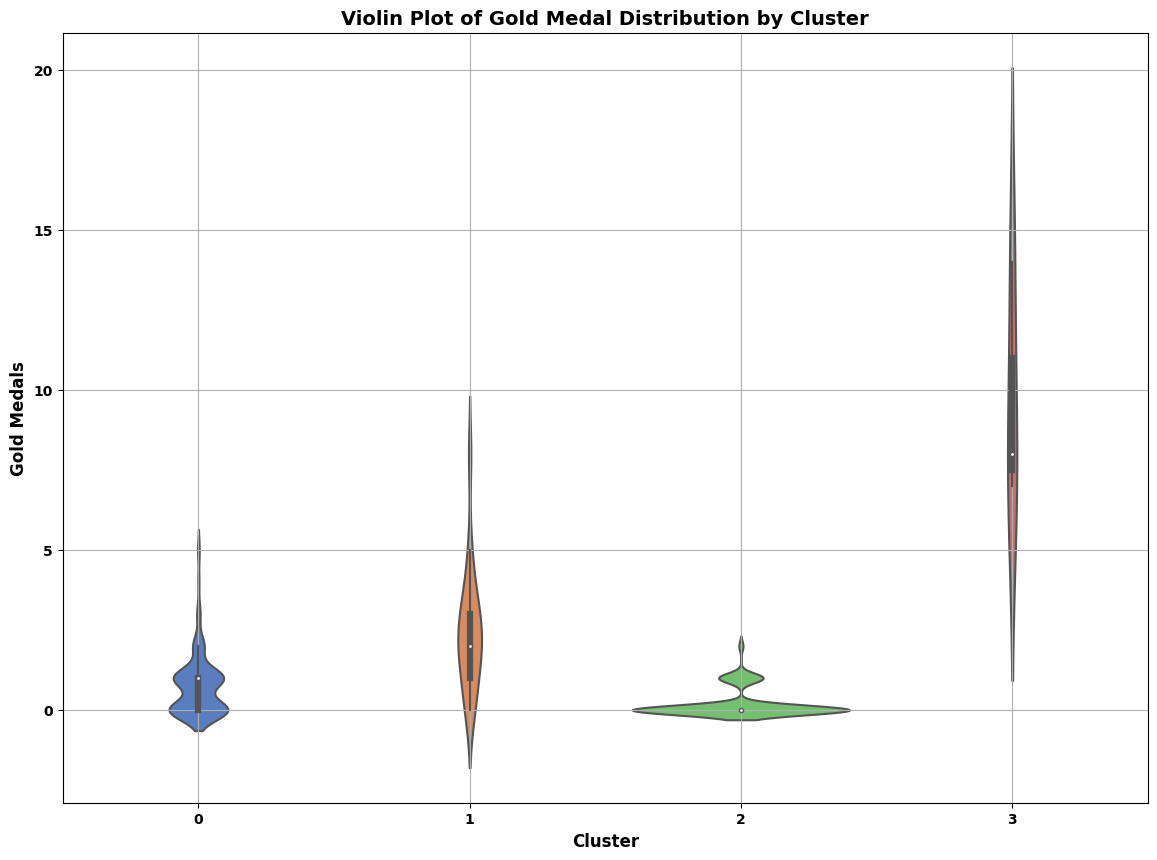

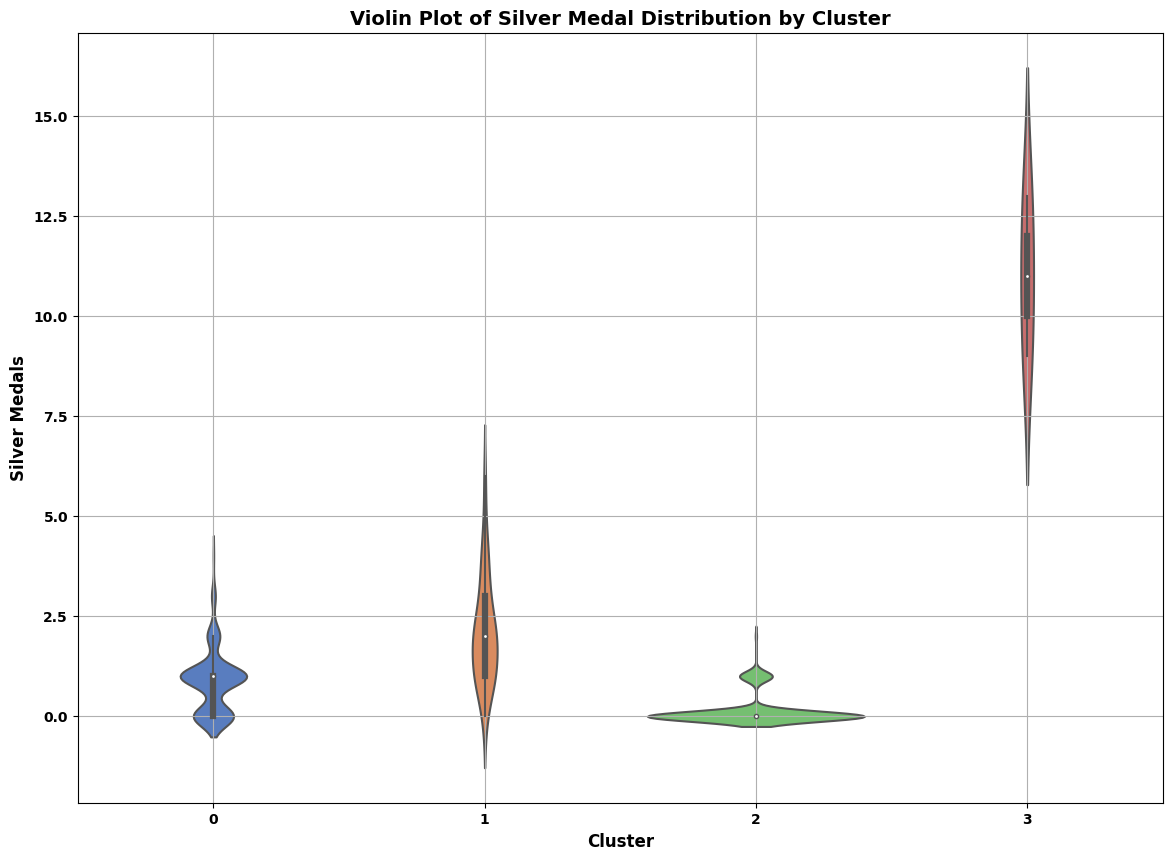

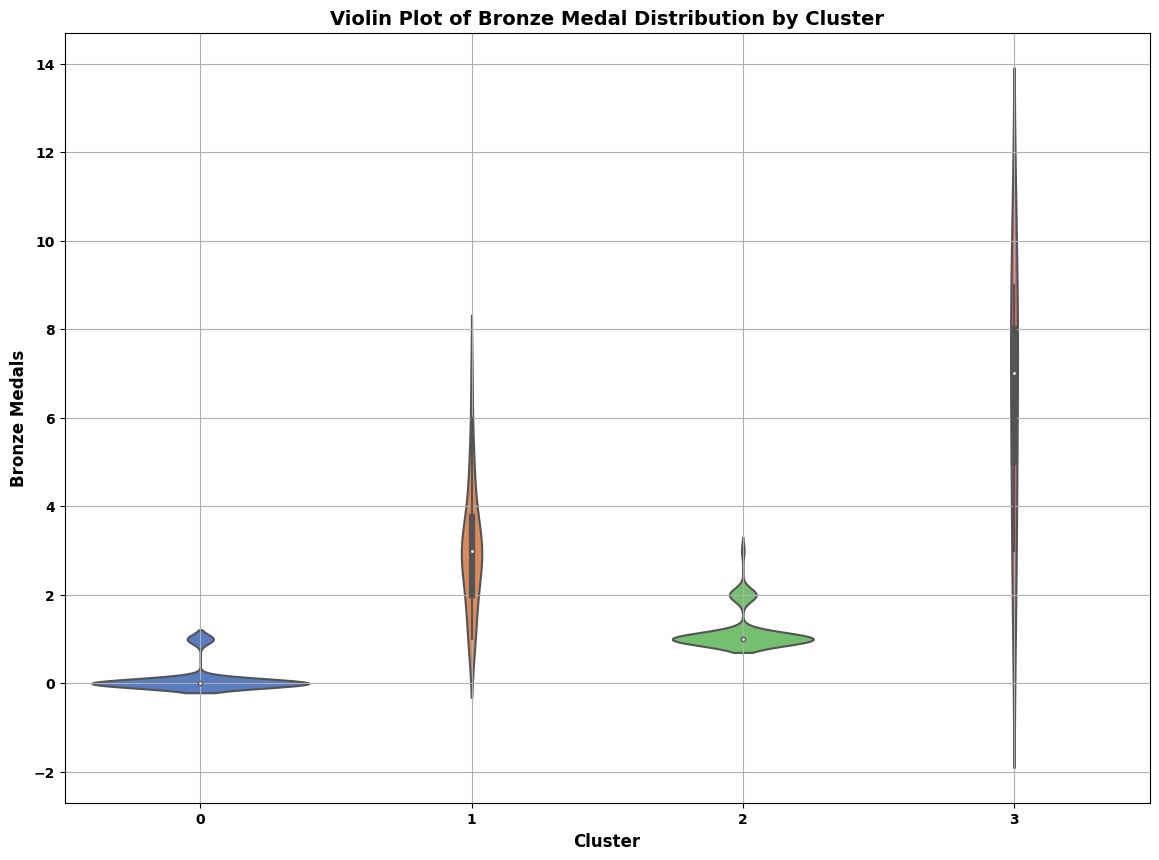

In [32]:
plt.figure(figsize=(14, 10))
sns.violinplot(x='Cluster', y='Gold', data=df, palette='muted', inner='box')
plt.title('Violin Plot of Gold Medal Distribution by Cluster', fontsize=14, fontweight='bold')
plt.xlabel('Cluster', fontsize=12, fontweight='bold')
plt.ylabel('Gold Medals', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.grid(True)
plt.show()
plt.figure(figsize=(14, 10))
sns.violinplot(x='Cluster', y='Silver', data=df, palette='muted', inner='box')
plt.title('Violin Plot of Silver Medal Distribution by Cluster', fontsize=14, fontweight='bold')
plt.xlabel('Cluster', fontsize=12, fontweight='bold')
plt.ylabel('Silver Medals', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.grid(True)
plt.show()
plt.figure(figsize=(14, 10))
sns.violinplot(x='Cluster', y='Bronze', data=df, palette='muted', inner='box')
plt.title('Violin Plot of Bronze Medal Distribution by Cluster', fontsize=14, fontweight='bold')
plt.xlabel('Cluster', fontsize=12, fontweight='bold')
plt.ylabel('Bronze Medals', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.grid(True)
plt.show()


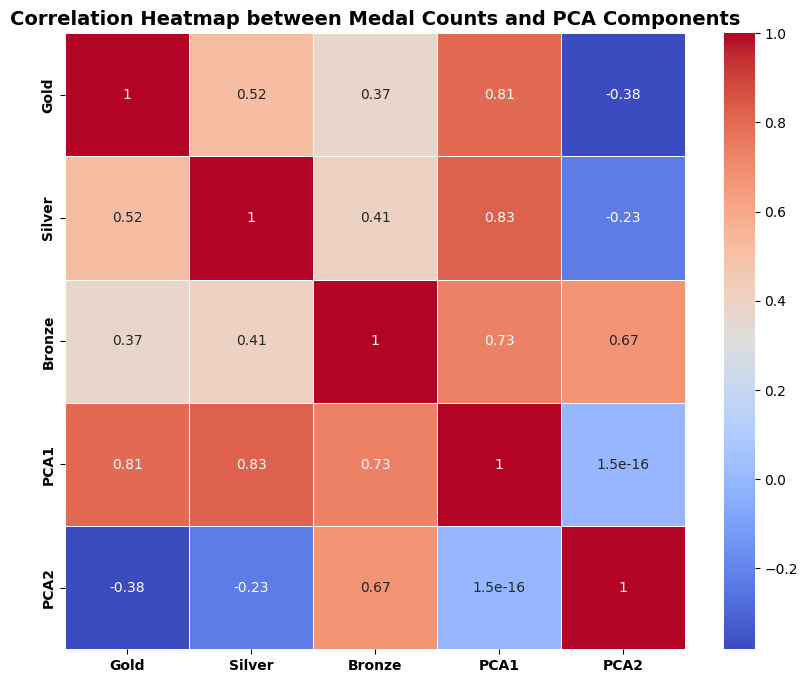

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Gold', 'Silver', 'Bronze', 'PCA1', 'PCA2']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap between Medal Counts and PCA Components', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.show()

/tmp/ipykernel_18/3138818352.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Gold'], label='Gold', shade=True, color='gold')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_18/3138818352.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Silver'], label='Silver', shade=True, color='silver')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with p

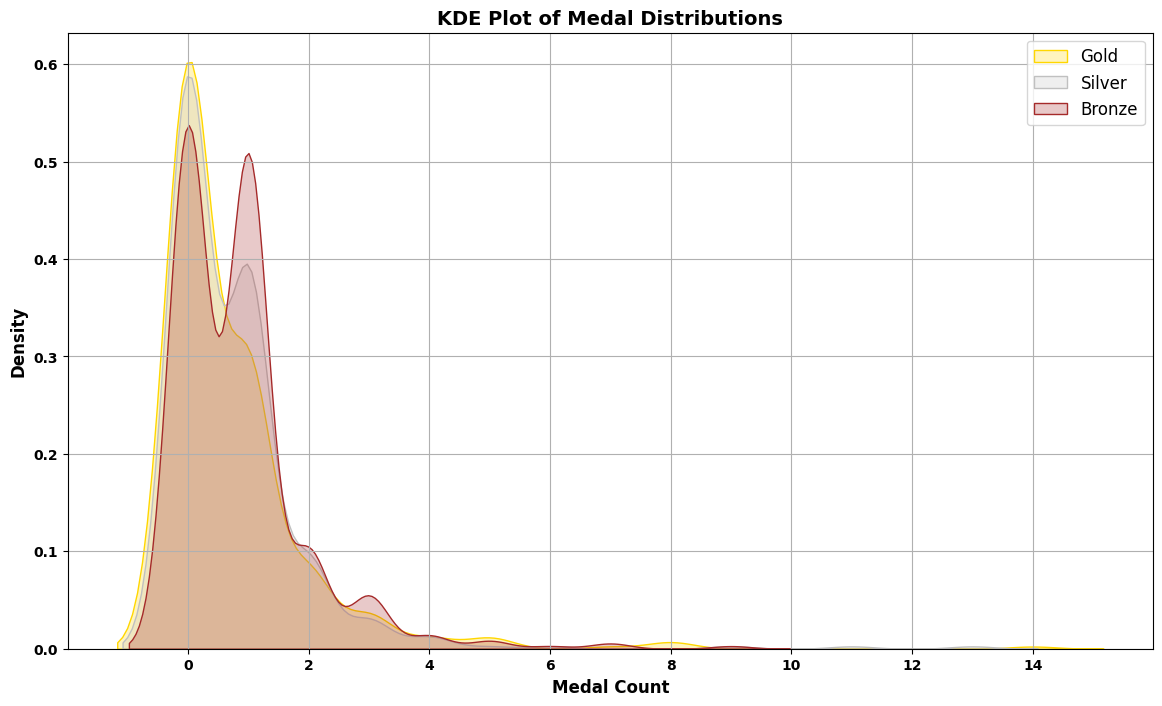

In [34]:
plt.figure(figsize=(14, 8))
sns.kdeplot(df['Gold'], label='Gold', shade=True, color='gold')
sns.kdeplot(df['Silver'], label='Silver', shade=True, color='silver')
sns.kdeplot(df['Bronze'], label='Bronze', shade=True, color='brown')
plt.title('KDE Plot of Medal Distributions', fontsize=14, fontweight='bold')
plt.xlabel('Medal Count', fontsize=12, fontweight='bold')
plt.ylabel('Density', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

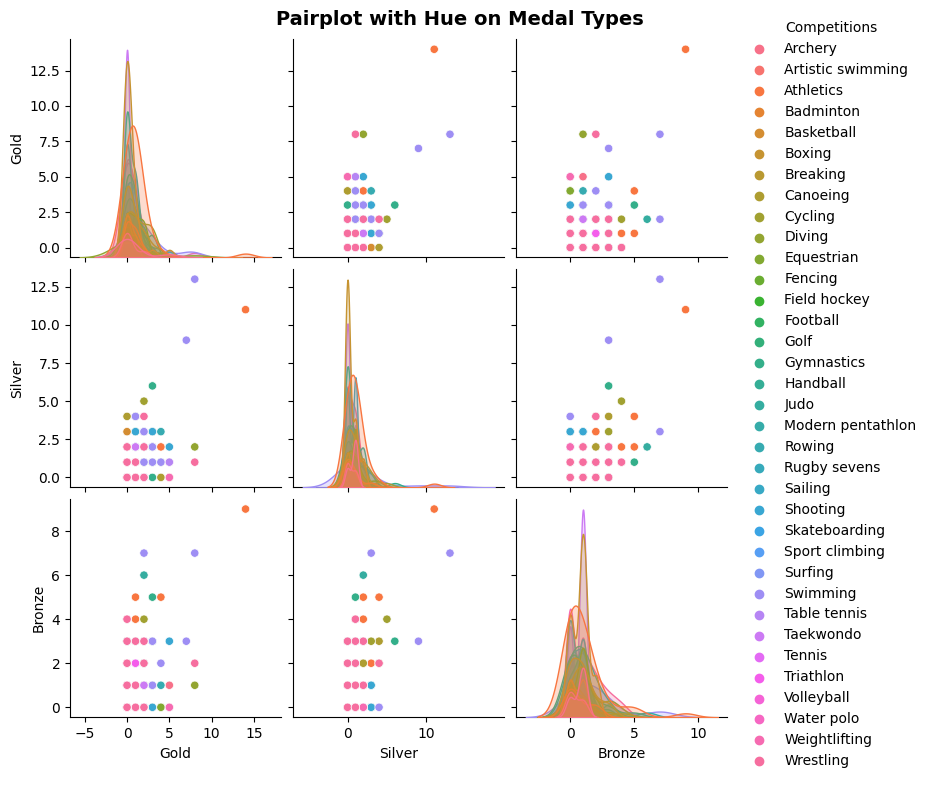

In [35]:
sns.pairplot(df, hue='Competitions', vars=['Gold', 'Silver', 'Bronze'], palette='husl', diag_kind='kde')
plt.suptitle('Pairplot with Hue on Medal Types', y=1.02, fontsize=14, fontweight='bold')
plt.show()

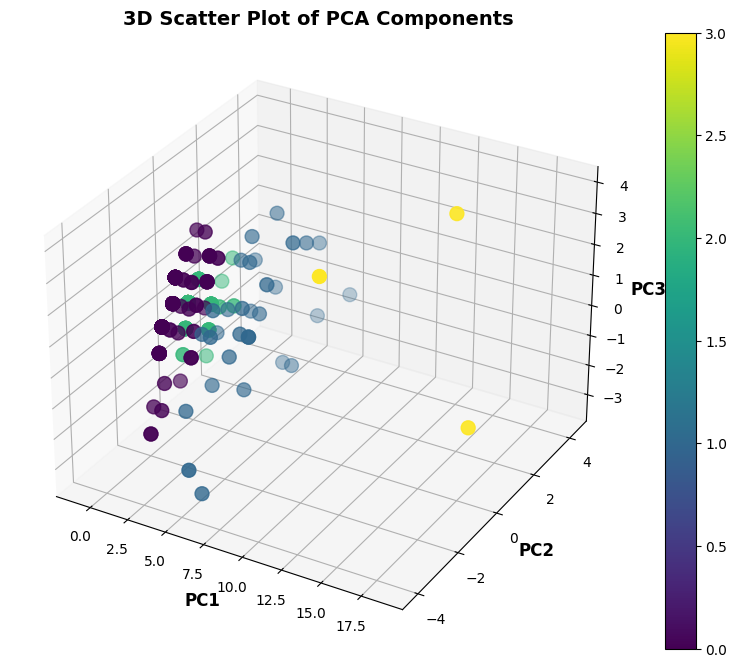

In [36]:
from mpl_toolkits.mplot3d import Axes3D
pca_3d = PCA(n_components=3)
pca_3d_fit = pca_3d.fit_transform(df[['Gold', 'Silver', 'Bronze']])
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_3d_fit[:, 0], pca_3d_fit[:, 1], pca_3d_fit[:, 2], c=df['Cluster'], cmap='viridis', s=100)
ax.set_title('3D Scatter Plot of PCA Components', fontsize=14, fontweight='bold')
ax.set_xlabel('PC1', fontsize=12, fontweight='bold')
ax.set_ylabel('PC2', fontsize=12, fontweight='bold')
ax.set_zlabel('PC3', fontsize=12, fontweight='bold')
plt.colorbar(scatter)
plt.show()


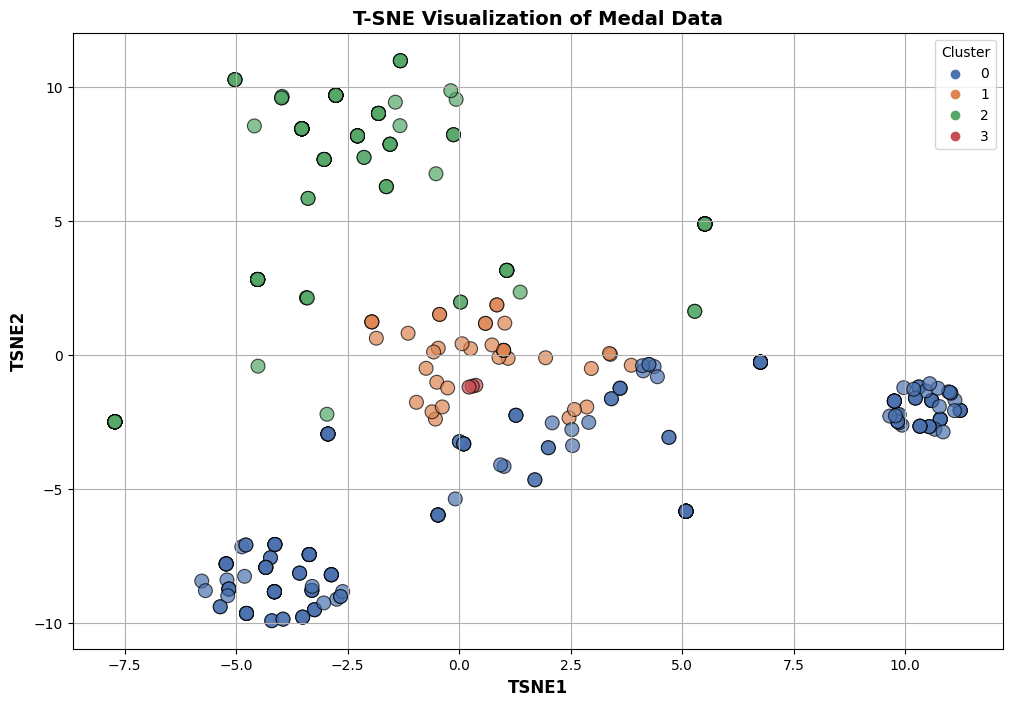

In [37]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
tsne_results = tsne.fit_transform(df[['Gold', 'Silver', 'Bronze']])
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['Cluster'] = df['Cluster']
plt.figure(figsize=(12, 8))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Cluster', palette='deep', s=100, alpha=0.7, edgecolor='k')
plt.title('T-SNE Visualization of Medal Data', fontsize=14, fontweight='bold')
plt.xlabel('TSNE1', fontsize=12, fontweight='bold')
plt.ylabel('TSNE2', fontsize=12, fontweight='bold')
plt.grid(True)
plt.show()


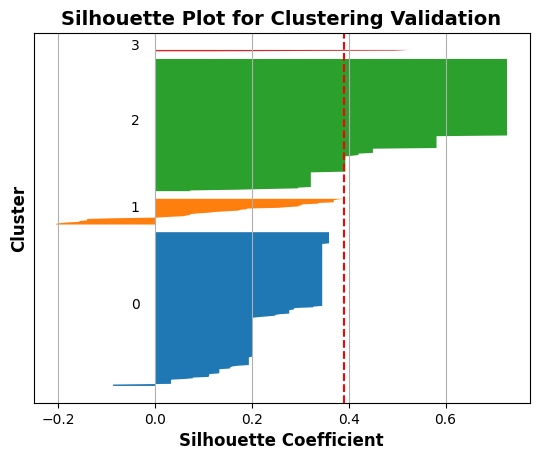

In [38]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_vals = silhouette_samples(df[['Gold', 'Silver', 'Bronze']], df['Cluster'])
silhouette_avg = silhouette_score(df[['Gold', 'Silver', 'Bronze']], df['Cluster'])
y_lower = 10
for i in range(len(df['Cluster'].unique())):
    ith_cluster_silhouette_vals = silhouette_vals[df['Cluster'] == i]
    ith_cluster_silhouette_vals.sort()
    y_upper = y_lower + len(ith_cluster_silhouette_vals)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_vals)
    plt.text(-0.05, y_lower + 0.5 * len(ith_cluster_silhouette_vals), str(i))
    y_lower = y_upper + 10
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.title('Silhouette Plot for Clustering Validation', fontsize=14, fontweight='bold')
plt.xlabel('Silhouette Coefficient', fontsize=12, fontweight='bold')
plt.ylabel('Cluster', fontsize=12, fontweight='bold')
plt.yticks([])
plt.grid(True)
plt.show()


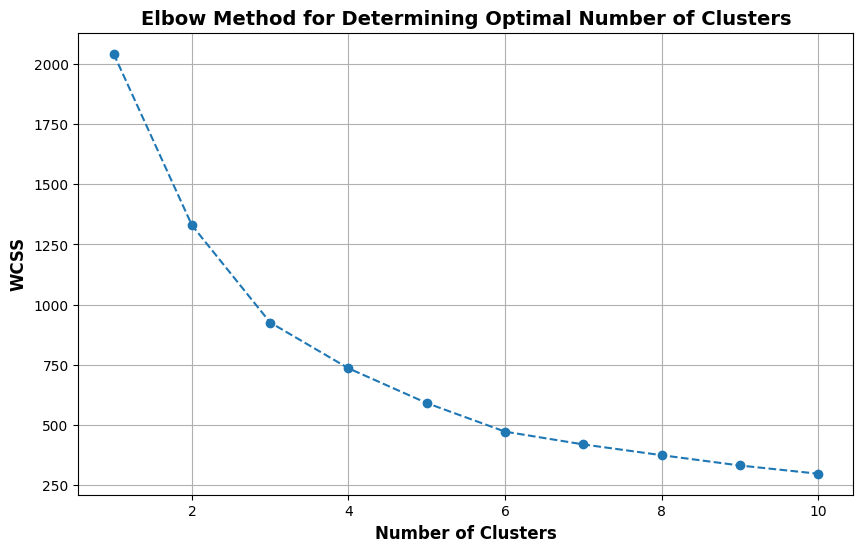

In [39]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df[['Gold', 'Silver', 'Bronze']])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Determining Optimal Number of Clusters', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters', fontsize=12, fontweight='bold')
plt.ylabel('WCSS', fontsize=12, fontweight='bold')
plt.grid(True)
plt.show()


In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = df[['Gold', 'Silver', 'Bronze']]
y = df['Total']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression - MAE: {mae_lr:.2f}, R²: {r2_lr:.2f}')


Linear Regression - MAE: 0.00, R²: 1.00


In [42]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Decision Tree - MAE: {mae_dt:.2f}, R²: {r2_dt:.2f}')


Decision Tree - MAE: 0.21, R²: 0.90


In [43]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - MAE: {mae_rf:.2f}, R²: {r2_rf:.2f}')


Random Forest - MAE: 0.15, R²: 0.95


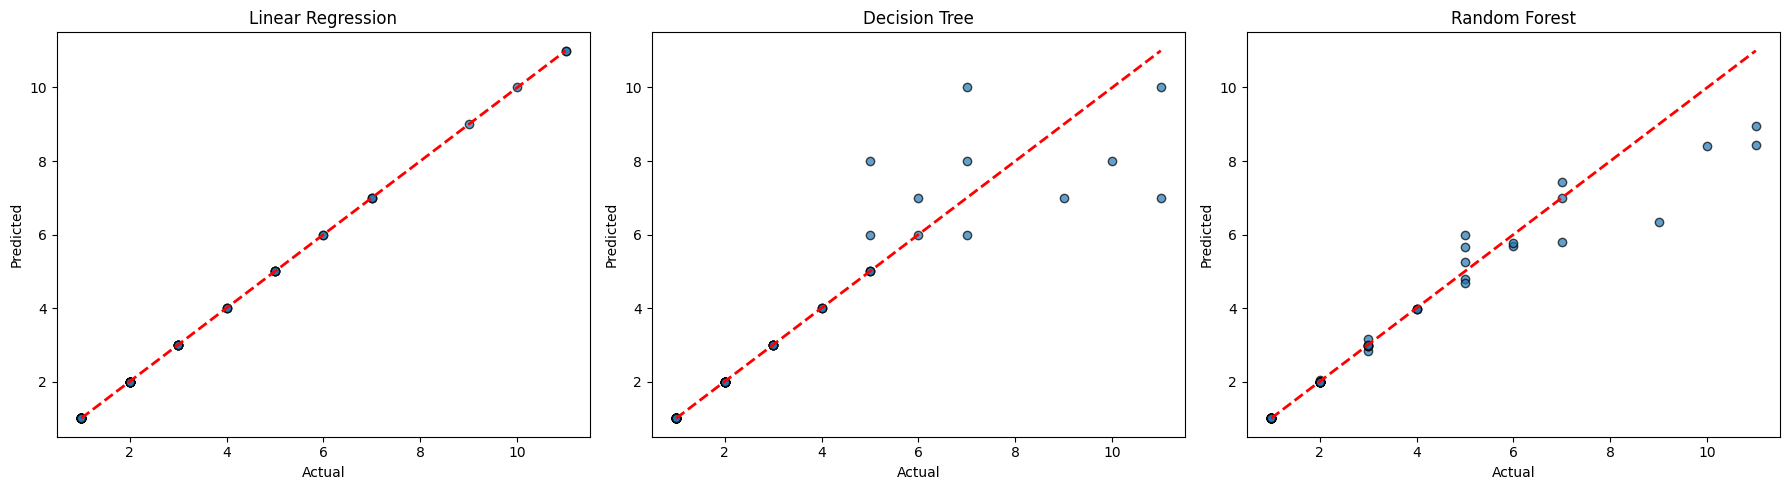

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Linear Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_dt, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Decision Tree')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_rf, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Random Forest')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()


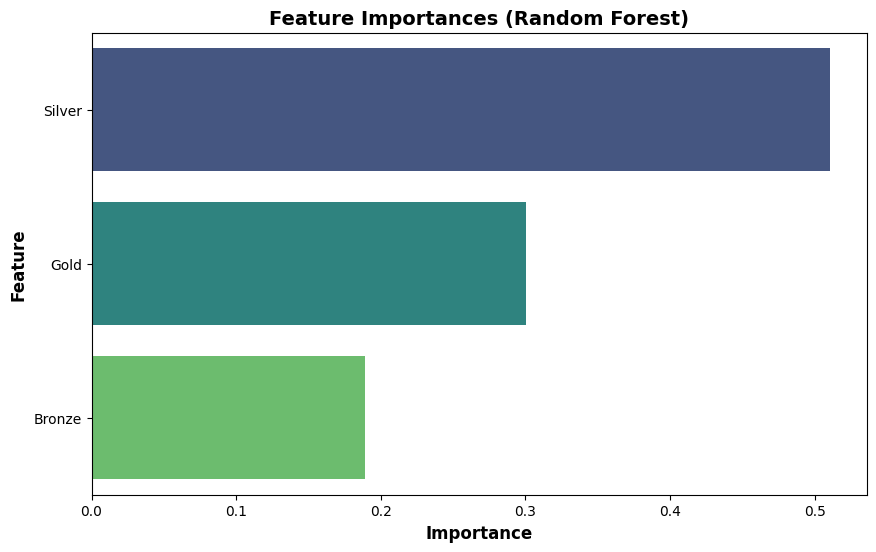

In [45]:
importances = rf_model.feature_importances_
features = ['Gold', 'Silver', 'Bronze']

feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importances (Random Forest)', fontsize=14, fontweight='bold')
plt.xlabel('Importance', fontsize=12, fontweight='bold')
plt.ylabel('Feature', fontsize=12, fontweight='bold')
plt.show()
